In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from cmcrameri import cm    # TO IMPORT?
import colorcet as cc
from scipy.special import ndtr
from scipy.optimize import curve_fit, differential_evolution
from scipy.stats import linregress
from math import sqrt, e

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [167]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2

# Rudy's data:

Raw data

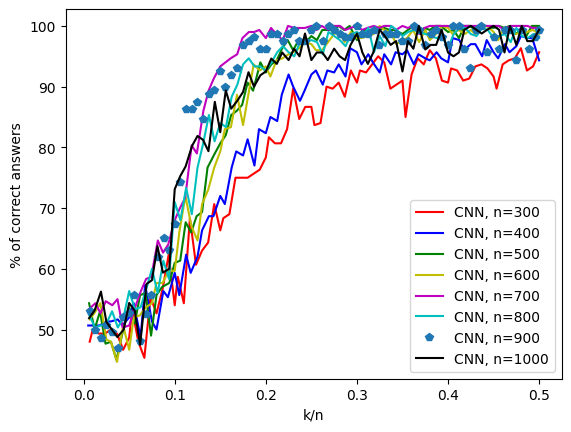

In [168]:
# x_n is the size of the cliques scaled with n or sqrt(n)
# y_n is instead the performance at that given clique size

# notice that the x_n arrays are scaled with n, while if you remove the first part (so the 1/math.sqrt(n)*np.array() ) you get the scaling with sqrt(n)

x_300 = 1/sqrt(300)*np.array([8.660254037844386, 8.544783984006461, 8.429313930168535, 8.31384387633061, 8.198373822492686, 8.08290376865476, 7.967433714816835, 7.851963660978909, 7.794228634059947, 7.678758580222022, 7.563288526384097, 7.447818472546172, 7.332348418708246, 7.216878364870321, 7.1014083110323964, 6.985938257194471, 6.928203230275509, 6.812733176437583, 6.697263122599658, 6.581793068761733, 6.466323014923808, 6.350852961085883, 6.235382907247958, 6.119912853410033, 6.0621778264910695, 5.946707772653145, 5.83123771881522, 5.715767664977294, 5.60029761113937, 5.484827557301444, 5.369357503463519, 5.253887449625594, 5.196152422706631, 5.080682368868707, 4.965212315030781, 4.849742261192856, 4.73427220735493, 4.618802153517006, 4.50333209967908, 4.387862045841155, 4.330127018922193, 4.214656965084267, 4.099186911246343, 3.9837168574084174, 3.8682468035704924, 3.752776749732567, 3.637306695894642, 3.5218366420567166, 3.4641016151377544, 3.348631561299829, 3.233161507461904, 3.117691453623979, 3.0022213997860536, 2.8867513459481287, 2.7712812921102032, 2.6558112382722783, 2.5980762113533156, 2.4826061575153906, 2.367136103677465, 2.25166604983954, 2.1361959960016152, 2.02072594216369, 1.9052558883257649, 1.7897858344878397, 1.7320508075688772, 1.616580753730952, 1.5011106998930268, 1.3856406460551016, 1.2701705922171767, 1.1547005383792515, 1.0392304845413263, 0.9237604307034011, 0.8660254037844386, 0.7505553499465134, 0.6350852961085883, 0.5196152422706631, 0.404145188432738, 0.28867513459481287, 0.1732050807568877, 0.11547005383792514])
y_300 = [95.66666666666667, 93.33333333333333, 92.66666666666667, 96.33333333333333, 94.66666666666667, 94.33333333333333, 93.66666666666667, 89.66666666666667, 91.66666666666667, 93.0, 93.66666666666667, 93.33333333333333, 91.33333333333333, 91.0, 92.66666666666667, 93.0, 90.66666666666667, 91.0, 94.66666666666667, 96.0, 93.66666666666667, 94.66666666666667, 92.0, 85.0, 91.0, 90.33333333333333, 89.66666666666667, 94.0, 95.0, 93.66666666666667, 92.33333333333333, 92.66666666666667, 90.66666666666667, 92.66666666666667, 88.33333333333333, 90.66666666666667, 89.66666666666667, 90.0, 84.0, 83.66666666666667, 86.66666666666667, 86.66666666666667, 84.66666666666667, 89.66666666666667, 83.0, 80.66666666666667, 80.66666666666667, 81.66666666666667, 78.33333333333333, 76.33333333333333, 75.66666666666667, 75.0, 75.0, 75.0, 69.0, 68.33333333333333, 66.33333333333333, 70.66666666666667, 64.33333333333333, 63.0, 60.666666666666664, 68.33333333333333, 54.333333333333336, 58.666666666666664, 54.0, 62.333333333333336, 56.666666666666664, 52.666666666666664, 55.333333333333336, 45.333333333333336, 48.0, 53.333333333333336, 48.666666666666664, 46.666666666666664, 49.333333333333336, 50.0, 49.333333333333336, 49.333333333333336, 50.0, 48.0]

x_400 = 1/sqrt(400)*np.array([10.0, 9.85, 9.75, 9.6, 9.5, 9.35, 9.25, 9.1, 9.0, 8.85, 8.75, 8.6, 8.5, 8.35, 8.25, 8.1, 8.0, 7.85, 7.75, 7.6, 7.5, 7.35, 7.25, 7.1, 7.0, 6.85, 6.75, 6.6, 6.5, 6.35, 6.25, 6.1, 6.0, 5.85, 5.75, 5.6, 5.5, 5.35, 5.25, 5.1, 5.0, 4.85, 4.75, 4.6, 4.5, 4.35, 4.25, 4.1, 4.0, 3.85, 3.75, 3.6, 3.5, 3.35, 3.25, 3.1, 3.0, 2.85, 2.75, 2.6, 2.5, 2.35, 2.25, 2.1, 2.0, 1.85, 1.75, 1.6, 1.5, 1.35, 1.25, 1.1, 1.0, 0.85, 0.75, 0.6, 0.5, 0.35, 0.25, 0.1])
y_400 = [94.33333333333333, 98.0, 98.0, 98.33333333333333, 96.66666666666667, 95.66666666666667, 97.0, 94.66666666666667, 95.66666666666667, 97.66666666666667, 95.0, 97.0, 97.0, 96.0, 97.66666666666667, 98.0, 94.0, 94.66666666666667, 95.66666666666667, 94.33333333333333, 94.66666666666667, 95.33333333333333, 93.66666666666667, 96.0, 95.33333333333333, 95.66666666666667, 93.66666666666667, 95.33333333333333, 92.33333333333333, 94.0, 95.33333333333333, 93.66666666666667, 95.66666666666667, 96.33333333333333, 91.66666666666667, 93.66666666666667, 92.33333333333333, 92.66666666666667, 90.33333333333333, 92.66666666666667, 92.0, 89.33333333333333, 87.66666666666667, 90.0, 92.0, 88.66666666666667, 84.33333333333333, 85.0, 82.33333333333333, 83.0, 77.0, 81.33333333333333, 78.66666666666667, 79.33333333333333, 76.66666666666667, 70.66666666666667, 72.0, 68.66666666666667, 68.66666666666667, 66.33333333333333, 62.0, 59.333333333333336, 62.333333333333336, 55.666666666666664, 59.333333333333336, 55.333333333333336, 56.333333333333336, 50.0, 51.333333333333336, 57.333333333333336, 48.666666666666664, 54.333333333333336, 52.0, 50.666666666666664, 51.666666666666664, 51.333333333333336, 51.333333333333336, 50.666666666666664, 50.666666666666664, 50.666666666666664]

x_500 = 1/sqrt(500)*np.array([11.180339887498947, 11.001454449298965, 10.867290370648977, 10.73312629199899, 10.598962213349003, 10.464798134699015, 10.330634056049028, 10.19646997739904, 10.062305898749052, 9.88342046054907, 9.749256381899082, 9.615092303249096, 9.480928224599108, 9.34676414594912, 9.212600067299133, 9.078435988649145, 8.94427190999916, 8.765386471799175, 8.631222393149187, 8.497058314499201, 8.362894235849213, 8.228730157199225, 8.094566078549239, 7.960401999899251, 7.826237921249263, 7.64735248304928, 7.513188404399293, 7.379024325749306, 7.244860247099318, 7.110696168449331, 6.976532089799344, 6.8423680111493566, 6.7082039324993685, 6.529318494299385, 6.395154415649398, 6.260990336999411, 6.126826258349423, 5.992662179699436, 5.858498101049449, 5.724334022399462, 5.590169943749474, 5.4112845055494905, 5.277120426899503, 5.142956348249516, 5.008792269599529, 4.874628190949541, 4.740464112299554, 4.606300033649567, 4.47213595499958, 4.337971876349592, 4.159086438149608, 4.024922359499621, 3.8907582808496337, 3.7565942021996466, 3.622430123549659, 3.488266044899672, 3.3541019662496843, 3.219937887599697, 3.041052449399714, 2.9068883707497264, 2.7727242920997393, 2.6385602134497517, 2.5043961347997645, 2.370232056149777, 2.23606797749979, 2.101903898849802, 1.923018460649819, 1.7888543819998317, 1.6546903033498443, 1.520526224699857, 1.3863621460498696, 1.2521980673998823, 1.118033988749895, 0.9838699100999074, 0.8049844718999243, 0.6708203932499369, 0.5366563145999494, 0.40249223594996214, 0.2683281572999747, 0.13416407864998736])
y_500 = [100.0, 100.0, 98.33333333333333, 99.33333333333333, 98.66666666666667, 100.0, 99.66666666666667, 100.0, 99.66666666666667, 100.0, 100.0, 99.33333333333333, 100.0, 100.0, 98.0, 99.33333333333333, 99.0, 100.0, 100.0, 99.33333333333333, 99.66666666666667, 99.0, 100.0, 99.33333333333333, 98.66666666666667, 99.33333333333333, 99.33333333333333, 99.66666666666667, 99.33333333333333, 99.33333333333333, 99.33333333333333, 99.33333333333333, 97.66666666666667, 100.0, 99.33333333333333, 100.0, 99.33333333333333, 99.33333333333333, 99.33333333333333, 97.66666666666667, 98.33333333333333, 97.0, 97.66666666666667, 96.0, 97.66666666666667, 96.33333333333333, 94.33333333333333, 93.66666666666667, 92.33333333333333, 94.0, 89.33333333333333, 90.66666666666667, 87.0, 86.0, 85.33333333333333, 82.0, 80.66666666666667, 79.0, 76.66666666666667, 69.33333333333333, 68.66666666666667, 66.0, 67.66666666666667, 61.333333333333336, 61.0, 57.666666666666664, 57.0, 55.666666666666664, 49.0, 56.0, 55.666666666666664, 51.0, 53.666666666666664, 50.333333333333336, 45.0, 48.0, 47.666666666666664, 53.0, 50.0, 54.333333333333336]

x_600 = 1/sqrt(600)*np.array([12.24744871391589, 12.084149397730345, 11.9208500815448, 11.757550765359255, 11.635076278220096, 11.471776962034552, 11.308477645849006, 11.14517832966346, 11.022703842524301, 10.859404526338757, 10.696105210153211, 10.532805893967666, 10.410331406828506, 10.247032090642962, 10.083732774457417, 9.920433458271871, 9.797958971132713, 9.634659654947168, 9.471360338761622, 9.308061022576076, 9.185586535436919, 9.022287219251373, 8.858987903065827, 8.695688586880282, 8.573214099741124, 8.409914783555578, 8.246615467370033, 8.083316151184487, 7.960841664045329, 7.797542347859784, 7.634243031674239, 7.470943715488693, 7.3484692283495345, 7.185169912163989, 7.021870595978444, 6.858571279792899, 6.73609679265374, 6.572797476468194, 6.4094981602826495, 6.246198844097104, 6.123724356957945, 5.9604250407724, 5.797125724586855, 5.63382640840131, 5.5113519212621505, 5.348052605076606, 5.18475328889106, 5.021453972705515, 4.898979485566357, 4.735680169380811, 4.572380853195265, 4.409081537009721, 4.286607049870562, 4.123307733685016, 3.960008417499471, 3.796709101313926, 3.6742346141747673, 3.510935297989222, 3.347635981803677, 3.184336665618132, 3.0618621784789726, 2.8985628622934274, 2.7352635461078822, 2.571964229922337, 2.4494897427831783, 2.2861904265976327, 2.1228911104120876, 1.9595917942265426, 1.8371173070873836, 1.6738179909018385, 1.510518674716293, 1.347219358530748, 1.2247448713915892, 1.0614455552060438, 0.8981462390204986, 0.7348469228349535, 0.6123724356957946, 0.4490731195102493, 0.2857738033247041, 0.16329931618554522])
y_600 = [98.66666666666667, 99.33333333333333, 99.0, 99.0, 98.66666666666667, 99.0, 99.66666666666667, 97.66666666666667, 99.0, 100.0, 99.66666666666667, 98.66666666666667, 99.33333333333333, 98.66666666666667, 99.33333333333333, 98.66666666666667, 99.66666666666667, 100.0, 98.66666666666667, 97.66666666666667, 99.33333333333333, 97.33333333333333, 99.33333333333333, 98.0, 97.66666666666667, 97.0, 99.0, 99.33333333333333, 100.0, 98.66666666666667, 98.33333333333333, 98.0, 98.0, 99.0, 97.33333333333333, 99.0, 98.66666666666667, 97.33333333333333, 96.0, 96.0, 97.0, 97.33333333333333, 96.33333333333333, 95.66666666666667, 95.33333333333333, 94.66666666666667, 94.33333333333333, 91.66666666666667, 93.33333333333333, 92.66666666666667, 93.66666666666667, 88.0, 83.66666666666667, 88.66666666666667, 83.33333333333333, 83.0, 79.33333333333333, 76.66666666666667, 73.0, 70.66666666666667, 64.66666666666667, 67.0, 72.0, 66.0, 59.666666666666664, 59.666666666666664, 57.666666666666664, 57.666666666666664, 54.333333333333336, 53.666666666666664, 52.333333333333336, 52.0, 46.666666666666664, 50.666666666666664, 44.666666666666664, 48.0, 48.333333333333336, 54.333333333333336, 52.666666666666664, 51.666666666666664]

x_700 = 1/sqrt(700)*np.array([13.228756555322953, 13.03977431881834, 12.88858852961465, 12.699606293110035, 12.548420503906344, 12.397234714702654, 12.20825247819804, 12.057066688994349, 11.905880899790658, 11.716898663286043, 11.565712874082353, 11.37673063757774, 11.22554484837405, 11.074359059170359, 10.885376822665744, 10.734191033462054, 10.583005244258363, 10.394023007753749, 10.242837218550058, 10.053854982045445, 9.902669192841753, 9.751483403638062, 9.56250116713345, 9.411315377929759, 9.260129588726068, 9.071147352221454, 8.919961563017763, 8.730979326513149, 8.579793537309458, 8.428607748105767, 8.239625511601155, 8.088439722397462, 7.937253933193772, 7.748271696689159, 7.597085907485467, 7.445900118281776, 7.256917881777163, 7.105732092573472, 6.916749856068859, 6.765564066865167, 6.614378277661476, 6.425396041156863, 6.274210251953172, 6.123024462749481, 5.934042226244868, 5.782856437041176, 5.593874200536563, 5.442688411332872, 5.291502622129181, 5.102520385624568, 4.951334596420876, 4.800148807217186, 4.611166570712572, 4.459980781508881, 4.270998545004268, 4.119812755800577, 3.968626966596886, 3.779644730092272, 3.6284589408885815, 3.4772731516848907, 3.288290915180277, 3.137105125976586, 2.9481228894719727, 2.7969371002682815, 2.6457513110645907, 2.456769074559977, 2.305583285356286, 2.1543974961525953, 1.9654152596479817, 1.8142294704442907, 1.6630436812405998, 1.4740614447359863, 1.3228756555322954, 1.1338934190276817, 0.9827076298239908, 0.8315218406202999, 0.6425396041156863, 0.4913538149119954, 0.3401680257083045, 0.15118578920369088])
y_700 = [99.66666666666667, 99.66666666666667, 100.0, 100.0, 100.0, 100.0, 99.33333333333333, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.66666666666667, 100.0, 100.0, 100.0, 100.0, 99.66666666666667, 98.66666666666667, 100.0, 99.66666666666667, 100.0, 99.33333333333333, 100.0, 100.0, 99.66666666666667, 100.0, 99.66666666666667, 99.33333333333333, 100.0, 99.66666666666667, 99.33333333333333, 100.0, 100.0, 99.33333333333333, 100.0, 99.33333333333333, 100.0, 99.66666666666667, 99.66666666666667, 99.66666666666667, 100.0, 97.66666666666667, 98.66666666666667, 99.66666666666667, 98.0, 99.33333333333333, 99.0, 99.0, 98.0, 95.33333333333333, 94.66666666666667, 94.0, 93.33333333333333, 91.33333333333333, 89.33333333333333, 86.0, 79.0, 80.33333333333333, 71.66666666666667, 70.0, 68.0, 64.0, 62.666666666666664, 64.66666666666667, 58.666666666666664, 58.333333333333336, 56.333333333333336, 53.333333333333336, 50.666666666666664, 50.333333333333336, 55.0, 54.0, 54.666666666666664, 52.666666666666664, 54.333333333333336, 53.333333333333336]

x_800 = 1/sqrt(800)*np.array([14.14213562373095, 13.965358928434313, 13.788582233137676, 13.61180553784104, 13.435028842544403, 13.258252147247765, 13.081475451951128, 12.904698756654492, 12.727922061357855, 12.551145366061219, 12.37436867076458, 12.197591975467944, 12.020815280171307, 11.84403858487467, 11.667261889578034, 11.490485194281398, 11.31370849898476, 11.136931803688123, 10.960155108391486, 10.78337841309485, 10.606601717798213, 10.429825022501575, 10.253048327204938, 10.076271631908302, 9.899494936611665, 9.722718241315029, 9.54594154601839, 9.369164850721754, 9.192388155425117, 9.015611460128481, 8.838834764831844, 8.662058069535206, 8.48528137423857, 8.308504678941933, 8.131727983645296, 7.954951288348659, 7.7781745930520225, 7.601397897755386, 7.424621202458749, 7.247844507162112, 7.071067811865475, 6.894291116568838, 6.7175144212722016, 6.540737725975564, 6.363961030678928, 6.18718433538229, 6.010407640085654, 5.833630944789017, 5.65685424949238, 5.480077554195743, 5.303300858899107, 5.126524163602469, 4.949747468305833, 4.772970773009195, 4.596194077712559, 4.419417382415922, 4.242640687119285, 4.065863991822648, 3.8890872965260113, 3.7123106012293743, 3.5355339059327373, 3.3587572106361008, 3.181980515339464, 3.005203820042827, 2.82842712474619, 2.6516504294495533, 2.4748737341529163, 2.2980970388562794, 2.1213203435596424, 1.9445436482630056, 1.7677669529663687, 1.590990257669732, 1.414213562373095, 1.2374368670764582, 1.0606601717798212, 0.8838834764831843, 0.7071067811865475, 0.5303300858899106, 0.35355339059327373, 0.17677669529663687])
y_800 = [98.0, 98.66666666666667, 98.0, 98.33333333333333, 99.66666666666667, 97.33333333333333, 98.66666666666667, 98.33333333333333, 98.0, 99.33333333333333, 99.66666666666667, 98.33333333333333, 98.66666666666667, 99.66666666666667, 99.66666666666667, 98.66666666666667, 96.33333333333333, 98.33333333333333, 98.0, 98.33333333333333, 98.66666666666667, 99.0, 99.33333333333333, 99.0, 98.33333333333333, 99.33333333333333, 100.0, 96.66666666666667, 98.33333333333333, 95.66666666666667, 99.66666666666667, 98.33333333333333, 99.0, 98.66666666666667, 96.66666666666667, 97.66666666666667, 98.33333333333333, 99.0, 95.33333333333333, 97.33333333333333, 97.66666666666667, 97.33333333333333, 97.33333333333333, 95.0, 95.66666666666667, 96.66666666666667, 95.66666666666667, 94.0, 92.66666666666667, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.66666666666667, 90.33333333333333, 88.33333333333333, 83.33333333333333, 84.0, 81.0, 85.33333333333333, 80.66666666666667, 76.66666666666667, 69.0, 73.33333333333333, 68.0, 71.0, 58.333333333333336, 61.333333333333336, 56.0, 60.0, 56.666666666666664, 53.666666666666664, 53.333333333333336, 56.333333333333336, 52.0, 50.333333333333336, 53.0, 51.0, 50.666666666666664, 50.333333333333336, 52.333333333333336]

x_900 = 1/sqrt(900)*np.array([15.0, 14.86666666666667, 14.66666666666667, 14.433333333333334, 14.233333333333333, 14.033333333333333, 13.866666666666667, 13.666666666666666, 13.5, 13.3, 13.1, 12.933333333333334, 12.733333333333333, 12.533333333333333, 12.366666666666667, 12.166666666666666, 12.0, 11.8, 11.6, 11.433333333333334, 11.233333333333333, 11.033333333333333, 10.866666666666667, 10.666666666666666, 10.5, 10.3, 10.1, 9.933333333333334, 9.733333333333333, 9.566666666666666, 9.366666666666667, 9.166666666666666, 9.0, 8.8, 8.6, 8.433333333333334, 8.233333333333333, 8.066666666666666, 7.866666666666666, 7.666666666666667, 7.5, 7.3, 7.1, 6.933333333333334, 6.733333333333333, 6.566666666666666, 6.366666666666666, 6.166666666666667, 6.0, 5.8, 5.6, 5.433333333333334, 5.233333333333333, 5.066666666666666, 4.866666666666666, 4.666666666666667, 4.5, 4.3, 4.133333333333334, 3.933333333333333, 3.7333333333333334, 3.566666666666667, 3.3666666666666667, 3.1666666666666665, 3.0, 2.8, 2.6333333333333333, 2.433333333333333, 2.2333333333333334, 2.066666666666667, 1.8666666666666667, 1.6666666666666667, 1.5, 1.3, 1.1333333333333333, 0.9333333333333333, 0.7333333333333333, 0.5666666666666667, 0.36666666666666664, 0.2])
y_900 = [99.375, 98.128, 96.25, 99.375, 94.375, 99.375, 99.375, 96.25, 98.125, 95.625, 100.0, 99.375, 93.125, 96.25, 100.0, 100.0, 96.875, 98.125, 99.375, 98.75, 96.875, 99.375, 100.0, 97.5, 97.5, 98.75, 98.75, 98.75, 96.875, 99.375, 98.75, 98.75, 100.0, 98.125, 98.125, 98.75, 99.375, 100.0, 97.5, 100.0, 99.375, 97.5, 97.5, 99.375, 98.75, 97.5, 98.75, 98.75, 96.25, 96.25, 98.125, 97.5, 96.875, 93.125, 91.875, 90.0, 92.5, 89.375, 88.75, 84.75, 87.5, 86.25, 86.25, 74.375, 67.375, 63.125, 65.0, 61.875, 55.625, 52.5, 48.125, 55.625, 52.666666666666664, 52.0, 47.0, 49.666666666666664, 50.666666666666664, 48.666666666666664, 50.0, 53.0]

x_1000 = 1/sqrt(1000)*np.array([15.811388300841896, 15.59002886463011, 15.400292205020008, 15.210555545409905, 15.020818885799802, 14.799459449588015, 14.609722789977912, 14.41998613036781, 14.230249470757707, 14.00889003454592, 13.819153374935818, 13.629416715325716, 13.439680055715613, 13.218320619503826, 13.028583959893723, 12.83884730028362, 12.649110640673518, 12.427751204461732, 12.238014544851628, 12.048277885241525, 11.858541225631424, 11.637181789419635, 11.447445129809534, 11.25770847019943, 11.067971810589327, 10.846612374377541, 10.65687571476744, 10.467139055157336, 10.277402395547233, 10.056042959335446, 9.866306299725343, 9.676569640115241, 9.486832980505138, 9.265473544293352, 9.075736884683248, 8.886000225073147, 8.696263565463044, 8.474904129251257, 8.285167469641154, 8.09543081003105, 7.905694150420948, 7.684334714209162, 7.494598054599059, 7.304861394988956, 7.115124735378854, 6.893765299167067, 6.704028639556964, 6.5142919799468615, 6.324555320336759, 6.134818660726656, 5.913459224514869, 5.723722564904767, 5.533985905294664, 5.344249245684561, 5.122889809472775, 4.9331531498626715, 4.743416490252569, 4.553679830642467, 4.332320394430679, 4.142583734820577, 3.952847075210474, 3.7631104156003716, 3.541750979388585, 3.352014319778482, 3.1622776601683795, 2.9725410005582766, 2.7511815643464903, 2.5614449047363874, 2.3717082451262845, 2.1819715855161816, 1.9606121493043953, 1.7708754896942924, 1.5811388300841898, 1.3914021704740869, 1.1700427342623003, 0.9803060746521977, 0.7905694150420949, 0.6008327554319921, 0.37947331922020555, 0.18973665961010278])
y_1000 = [99.375, 97.5, 97.5, 100.0, 96.875, 100.0, 95.625, 99.375, 100.0, 99.375, 98.75, 99.375, 100.0, 99.375, 95.625, 95.0, 95.625, 99.375, 96.875, 96.875, 96.125, 100.0, 96.25, 97.5, 92.5, 97.5, 96.875, 98.25, 99.375, 95.625, 93.75, 95.625, 98.75, 96.875, 94.375, 95.0, 96.25, 94.375, 95.625, 95.625, 94.375, 98.75, 95.0, 96.25, 94.375, 95.625, 93.75, 94.625, 92.5, 91.875, 90.0, 92.375, 89.125, 87.75, 86.375, 89.375, 82.5, 87.5, 79.375, 81.25, 81.875, 80.25, 76.875, 75.25, 73.125, 60.0, 59.375, 63.75, 58.125, 57.5, 47.5, 53.125, 54.375, 50.0, 48.75, 50.0, 51.25, 56.25, 53.125, 51.875]

fig, ax = plt.subplots()
ax.plot(x_300, y_300, 'r', label='CNN, n=300')
ax.plot(x_400, y_400, 'b', label='CNN, n=400')
ax.plot(x_500, y_500, 'g', label='CNN, n=500')
ax.plot(x_600, y_600, 'y', label='CNN, n=600')
ax.plot(x_700, y_700, 'm', label='CNN, n=700')
ax.plot(x_800, y_800, 'c', label='CNN, n=800')
ax.plot(x_900, y_900, 'p', label='CNN, n=900')
ax.plot(x_1000, y_1000, 'k', label='CNN, n=1000')
plt.xlabel('k/n')
plt.ylabel('% of correct answers')
ax.legend()
plt.show()

Fitting data:

In [169]:
# CONSTRUCTING UNIQUE DATAFRAME FOR MACHINES DATA:
df_machines_appended = []
N_range = [300,400,500,600,700,800,900,1000]
for N in N_range:
    K = eval(f'x_{300}')*N
    df_machines_appended.append(pd.DataFrame({'N':np.full(K.size, N), 'K':K, 'fc':np.array(eval(f'y_{N}'))/100}))
    
# creating single df for machines:    
df_machines = pd.concat(df_machines_appended)
# creating new variables and adding them to the dataframe:
df_machines['K/sqrt(N)'] = df_machines['K']/np.sqrt(df_machines['N'])
# dropping the indices so that there are no duplicates:
df_machines = df_machines.reset_index(drop=True)
df_machines

,N,K,fc,K/sqrt(N)
0,300,150.000000,0.956667,8.660254
1,300,148.000000,0.933333,8.544784
2,300,146.000000,0.926667,8.429314
3,300,144.000000,0.963333,8.313844
4,300,142.000000,0.946667,8.198374
...,...,...,...,...
635,1000,30.000000,0.500000,0.948683
636,1000,23.333333,0.512500,0.737865
637,1000,16.666667,0.562500,0.527046
638,1000,10.000000,0.531250,0.316228


In [170]:
# fitting the data to the sigmoid function:
fitted_params_machines = []
for N in N_range:
    data_for_fit = df_machines[df_machines['N']==N]
    fitted_params_machines.append(curve_fit(sigmoid, data_for_fit['K'], data_for_fit['fc'], p0=(70, 20))[0])
fitted_params_machines = np.array(fitted_params_machines)
fitted_params_machines

array([[ 58.80737828,  33.29675697],
       [ 68.46027866,  32.85823454],
       [ 69.27400747,  25.20132158],
       [ 83.71106137,  32.53121318],
       [ 77.29392113,  27.54067579],
       [ 99.0216184 ,  43.13557021],
       [ 97.06376318,  32.5091164 ],
       [120.42100341,  58.5104647 ]])

In [171]:
# Creating dataframe of fitted parameters:
df_rudy_fitted_params = pd.DataFrame(columns=['N', 'K0', 'Delta'])
dfs = []
# Loop through the array and populate the dataframe
for i in range(len(N_range)):
    N = N_range[i]
    K0_value = fitted_params_machines[i, 0]
    delta_value = fitted_params_machines[i, 1]
    df = pd.DataFrame({'N': [N], 'K0': [K0_value], 'Delta': [delta_value]})
    dfs.append(df)
df_rudy_fitted_params = pd.concat(dfs, ignore_index=True)
df_rudy_fitted_params

,N,K0,Delta
0,300,58.807378,33.296757
1,400,68.460279,32.858235
2,500,69.274007,25.201322
3,600,83.711061,32.531213
4,700,77.293921,27.540676
5,800,99.021618,43.135570
6,900,97.063763,32.509116
7,1000,120.421003,58.510465


In [172]:
# fitting linearly K0 as a function of N and storing slope and intercept:
slope, intercept, r_value, p_value, std_err = linregress(df_machines_fitted_params['N'], df_machines_fitted_params['K0'])

# Checkpoint 2 ("2024-08-08_checkpoint") data:

In [173]:
# defining the function to calculate fitted parameters for all models in a single experiment:
def calculate_fitted_params(exp_name):
    # go to exp folder:
    folder_path = os.path.join('..', '..', 'results', 'data', exp_name)
    fitted_params_df = pd.DataFrame()  # create an empty dataframe for recap
    # loop over all folders in the experiment folder (each folder corresponds to a model)
    for folder_name in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, folder_name)):
            file_path = os.path.join(folder_path, folder_name, f'{folder_name}_N224_fraction_correct.csv')
            if os.path.isfile(file_path):
                df_fraction_correct = pd.read_csv(file_path)
                fitted_values = [curve_fit(sigmoid, df_fraction_correct['clique size'], df_fraction_correct['fraction correct'], p0=(70, 20))[0]]
                fitted_params_model = pd.DataFrame(fitted_values, columns=['K0', 'Delta'])
                fitted_params_model['model'] = folder_name
                fitted_params_df = pd.concat([fitted_params_df, fitted_params_model], ignore_index=True)

    return fitted_params_df

# calculate fitted params for target experiment:
df_checkpoint_fitted_params = calculate_fitted_params('2024-08-08_checkpoint')

# add N column to dataframe (N=224 for all values):
df_checkpoint_fitted_params['N'] = 224

# isolate the models where K0<140:
df_checkpoint_fitted_params = df_checkpoint_fitted_params[df_checkpoint_fitted_params['K0'] < 140]
df_checkpoint_fitted_params

,K0,Delta,model,N
0,36.483891,6.670578,CNN_large_1,224
1,36.396668,4.563833,CNN_large_2,224
2,38.845730,6.750792,CNN_medium_1,224
3,37.744017,7.463071,CNN_medium_2,224
4,53.693890,11.846172,CNN_rudy,224
5,41.812475,12.483485,CNN_small_1,224
6,41.100867,8.297267,CNN_small_2,224
7,49.645897,12.847686,GoogLeNetpretrained,224
8,32.970002,8.526118,GoogLeNetscratch,224
9,51.246546,11.127686,MLP,224


# Human data:

K0 values retrieved from "Pilot2-combined-analysis.ipynb" (cell 25)

In [174]:
# Dictionary containing the data from the pilot:
human_data = {
    "subject_number": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15],
    "N": [300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000, 300, 1000],
    "K0": [
        63.376421, 101.706023, 58.745489, 117.000001, 44.120618, 117.594153, 49.771776, 92.021640, 
        45.204086, 96.668492, 55.106889, 120.846179, 62.218464, 121.833296, 63.945276, 116.711473, 
        36.303401, 98.652622, 44.053990, 54.591092, 44.146266, 85.209179, 47.651970, 100.860897, 
        45.081888, 92.569721, 71.677963, 125.328521, 40.864063, 89.413316
    ],
    "Delta": [
        17.051974, 77.307746, 10.931999, 2.502066, 7.027207, 43.151471, 9.032915, 32.990984, 
        20.727395, 28.820746, 18.931351, 40.814821, 7.761540, 43.931693, 5.690442, 37.706514, 
        9.637127, 39.415463, 13.198500, 100.919698, 2.068134, 34.093975, 13.206885, 36.703784, 
        18.747229, 49.017982, 22.941128, 44.893479, 23.341216, 25.664119
    ]
}

# Create a DataFrame
df_humans_fitted_params_subjectpool = pd.DataFrame(human_data)

# Display the DataFrame
df_humans_fitted_params_subjectpool

,subject_number,N,K0,Delta
0,1,300,63.376421,17.051974
1,1,1000,101.706023,77.307746
2,2,300,58.745489,10.931999
3,2,1000,117.000001,2.502066
4,3,300,44.120618,7.027207
5,3,1000,117.594153,43.151471
6,4,300,49.771776,9.032915
7,4,1000,92.021640,32.990984
8,5,300,45.204086,20.727395
9,5,1000,96.668492,28.820746


# Comparison plot:

In [175]:
# Color palette for checkpoint data:
# - Define names of all models
model_names = ['MLP', 'CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy', 'VGG16scratch', 'ResNet50scratch', 'GoogLeNetscratch', 'ViTscratch', 'VGG16pretrained', 'ResNet50pretrained', 'GoogLeNetpretrained', 'ViTpretrained']  

# - Associate a color to each group of models:
# * MLP:
my_palette_MLP = sns.color_palette(cc.glasbey, len(model_names))[0]
# * CNNs:
my_palette_CNN = sns.color_palette(cc.glasbey, len(model_names))[1:8]
# * Scratch models:
my_palette_scratch = sns.color_palette(cc.glasbey, len(model_names))[8:12]
# * Pretrained models:
my_palette_pretrained = sns.color_palette(cc.glasbey, len(model_names))[12:16]

# defining complete palette:
my_palette_checkpoint = {
    'MLP': my_palette_MLP,
    'CNN_small_1': my_palette_CNN[0],
    'CNN_small_2': my_palette_CNN[1],
    'CNN_medium_1' : my_palette_CNN[2],
    'CNN_medium_2' : my_palette_CNN[3],
    'CNN_large_1' : my_palette_CNN[4],
    'CNN_large_2' : my_palette_CNN[5],
    'CNN_rudy' : my_palette_CNN[6],
    'VGG16scratch': my_palette_scratch[0],
    'ResNet50scratch': my_palette_scratch[1],
    'GoogLeNetscratch': my_palette_scratch[2],
    'ViTscratch': my_palette_scratch[3],
    'VGG16pretrained': my_palette_pretrained[0],
    'ResNet50pretrained': my_palette_pretrained[1],
    'GoogLeNetpretrained': my_palette_pretrained[2],
    'ViTpretrained': my_palette_pretrained[3]    
}

Drawing graph

C:\Users\danie\AppData\Local\Temp\ipykernel_3040\1844572234.py:28: RuntimeWarning: divide by zero encountered in log2
  K_it = 2 * np.log2(N)


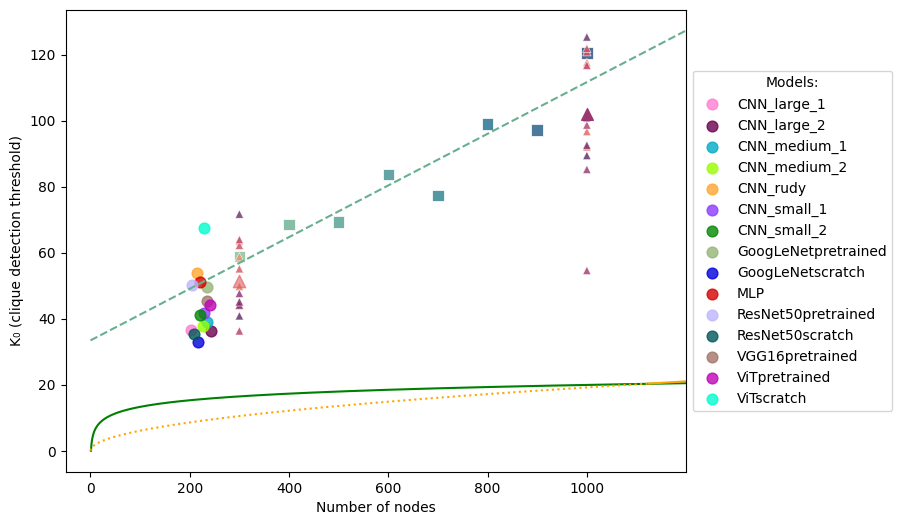

In [239]:
# Create a smaller figure with specified size
fig, ax = plt.subplots(figsize=(8, 6))

# RUDY'S DATA:
my_palette_rudy = sns.color_palette("crest", fitted_params_machines.shape[0])
ax_rudy = sns.scatterplot(data=df_rudy_fitted_params, x='N', y='K0', hue='N', palette=my_palette_rudy, legend=False, marker='s', s=70, alpha=0.8)

# HUMAN DATA:
my_palette_human_subjects = sns.color_palette("flare", 15)
my_palette_human_means = sns.color_palette("flare", 2)
ax_humans = sns.scatterplot(data=df_humans_fitted_params_subjectpool, x='N', y='K0', hue='subject_number', palette=my_palette_human_subjects, legend=False, alpha=0.8, marker="^")
ax_humans.scatter(300, df_humans_fitted_params_subjectpool[df_humans_fitted_params_subjectpool['N'] == 300]['K0'].mean(), label='N=300', color=my_palette_human_means[0], s=80, alpha=0.6, marker="^")
ax_humans.scatter(1000, df_humans_fitted_params_subjectpool[df_humans_fitted_params_subjectpool['N'] == 1000]['K0'].mean(), label='N=1000', color=my_palette_human_means[1], s=70, marker="^")

# CHECKPOINT 2 DATA:
# Adding jitter to the x value (N=224) to prevent overlap:
jitter_strength = 15  # Adjust this value to control the jitter amount
for i, model in enumerate(df_checkpoint_fitted_params['model'].unique()):
    # Select the row for the current model
    model_data = df_checkpoint_fitted_params[df_checkpoint_fitted_params['model'] == model]
    # Add a small jitter to N=224
    jittered_N = np.random.normal(loc=224, scale=jitter_strength)
    # Plot the K0 value at jittered N
    ax.scatter(jittered_N, model_data['K0'].values[0], color=my_palette_checkpoint[model], label=f'{model}', s=60, alpha=0.8)

# THEORETICAL AND COMPUTATIONAL LIMITS:
N = np.arange(0, 1200)
K_it = 2 * np.log2(N)
K_comp = np.sqrt(N / e)
my_palette_limits = ['green', 'orange']
ax.plot(N, K_it, label='STAT limit', color=my_palette_limits[0])
ax.plot(N[:1125], K_comp[:1125], label='COMP limit', color=my_palette_limits[1], linestyle='dotted')
ax.plot(N[1125:], K_comp[1125:], label='COMP limit', color=my_palette_limits[1])

# Add axes labels to the plot
ax.set_xlabel('Number of nodes')
ax.set_ylabel('K₀ (clique detection threshold)')

# Drawing linear fit of machines' K0s with points' color gradient
y_values = slope * N + intercept
ax.plot(N, y_values, color=my_palette_rudy[1], linestyle='--')

# Ensure x-axis limits cover the necessary range
ax.set_xlim(-50, max(N))

# Customize legend:
handles, labels = ax.get_legend_handles_labels()
filtered_handles = []
filtered_labels = []

# List of labels you want to keep in the legend
labels_to_keep = df_checkpoint_fitted_params['model'].values

for handle, label in zip(handles, labels):
    if label in labels_to_keep:
        filtered_handles.append(handle)
        filtered_labels.append(label)

# Add a custom legend with only the desired elements
ax.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Models:')

# Save plot as high resolution png:
plt.savefig('rudy_humans_checkpoint_comparison.png', dpi=300, bbox_inches="tight")

plt.show()